In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
import seaborn as sns
sns.set(font_scale=1.5)

%matplotlib inline

In [3]:
df = pd.read_excel('../data/default of credit card clients.xls', index_col = 0)

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df.shape

(30001, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null  ob

### Data set information:
- Number of Instances: 30000
- Number of Attributes: 24
- Attribute Characteristics: Object
- Area: Business
- Data Set Characteristics: Multivariate
- Associated Tasks: Classification
- Date Donated: 01/26/2106

In [7]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [8]:
df.nunique()

X1        82
X2         3
X3         8
X4         5
X5        57
X6        12
X7        12
X8        12
X9        12
X10       11
X11       11
X12    22724
X13    22347
X14    22027
X15    21549
X16    21011
X17    20605
X18     7944
X19     7900
X20     7519
X21     6938
X22     6898
X23     6940
Y          3
dtype: int64

- This function does not give me the statistics of the columns, so I need to change the types of the column.

In [9]:
new_header = df.iloc[0] # grab the first row for the header
df = df[1:] # take the data less the header row
df.columns = new_header # set the header row as the df header

In [10]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Data Cleaning

- Renaming the columns in a more convenient way
- Changing the data type of the columns as needed
- Checking the null values and figure out how to deal with them
- Investigating the outliers and figure out how to deal with them

In [11]:
# renaming the columns
column_dict = {'LIMIT_BAL': 'credit_limit', 'SEX': 'sex', 'EDUCATION': 'education', 'MARRIAGE': 'marital_status', 'AGE': 'age', 
               'PAY_0': 'pay_status_sep', 'PAY_2': 'pay_status_aug', 'PAY_3': 'pay_status_jul', 'PAY_4': 'pay_status_jun', 'PAY_5': 'pay_status_may', 'PAY_6': 'pay_status_apr', 
               'BILL_AMT1': 'bill_sep', 'BILL_AMT2': 'bill_aug', 'BILL_AMT3': 'bill_jul', 'BILL_AMT4': 'bill_jun', 'BILL_AMT5': 'bill_may', 'BILL_AMT6': 'bill_apr', 
               'PAY_AMT1': 'pay_sep', 'PAY_AMT2': 'pay_aug', 'PAY_AMT3': 'pay_jul', 'PAY_AMT4': 'pay_jun', 'PAY_AMT5': 'pay_may', 'PAY_AMT6': 'pay_apr', 
               'default payment next month': 'next_default_payment'}

df = df.rename(columns = column_dict)

In [12]:
df.columns

Index(['credit_limit', 'sex', 'education', 'marital_status', 'age',
       'pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_sep', 'bill_aug', 'bill_jul',
       'bill_jun', 'bill_may', 'bill_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr', 'next_default_payment'],
      dtype='object', name='ID')

### Attribute Information:

- credit_limit: Amount of the given credit (NT dollar). It includes both the individual consumer credit and his/her family (supplementary) credit.
- sex: 1 = male; 2 = female
- education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
- marital_status: 1 = married; 2 = single; 3 = others
- age: year
- pay_status: History of past payment from April to September 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- bill_month: Amount of bill statement (NT dollar)
- pay_month: Amount of previous payment (NT dollar)

In [13]:
sum(df.duplicated())

35

### 35 datapoints are duplicated and need to be removed.

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
# changing the columns' dtypes
df = df.astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   credit_limit          29965 non-null  int32
 1   sex                   29965 non-null  int32
 2   education             29965 non-null  int32
 3   marital_status        29965 non-null  int32
 4   age                   29965 non-null  int32
 5   pay_status_sep        29965 non-null  int32
 6   pay_status_aug        29965 non-null  int32
 7   pay_status_jul        29965 non-null  int32
 8   pay_status_jun        29965 non-null  int32
 9   pay_status_may        29965 non-null  int32
 10  pay_status_apr        29965 non-null  int32
 11  bill_sep              29965 non-null  int32
 12  bill_aug              29965 non-null  int32
 13  bill_jul              29965 non-null  int32
 14  bill_jun              29965 non-null  int32
 15  bill_may              29965 non-null  int32
 16  bill_apr 

### Changing the data type from "object" to "int32" decreases the memory usage from 5.7MB to 3 MB.

In [17]:
df.describe()

ID,credit_limit,sex,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,next_default_payment
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
std,129760.135222,0.489128,0.790411,0.521997,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,...,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864,0.415101
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
df['sex'].value_counts()

2    18091
1    11874
Name: sex, dtype: int64

In [19]:
df['education'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: education, dtype: int64

In [20]:
df['marital_status'].value_counts()

2    15945
1    13643
3      323
0       54
Name: marital_status, dtype: int64

In [21]:
df['pay_status_apr'].value_counts()

 0    16286
-1     5736
-2     4865
 2     2766
 3      184
 4       48
 7       46
 6       19
 5       13
 8        2
Name: pay_status_apr, dtype: int64

### These columns has some undocumented values:
1. 'education' has 3 values of 0, 5, and 6.
2. 'marital_status' has value of 0.
3. 'pay_status_month' has value of 0 and -2.
4. 'bill_month' has negative values which may be considered as credit, since the corresonding 'pay_month' values are zero, which means no payment was needed. Having this said, the -2 label for 'pay_status_month' may mean no payment is needed.

In [22]:
# 1. 'education' has 3 values of 0, 5, and 6.

df[(df['education'] < 1) | (df['education'] > 4)].education.count()

345

- About 1% of the 'education' column is not within the defined range of [1,4], and since that is a small portion of the data, they can be either removed or documented as "other". I chose to remove them.

In [23]:
df.drop(df[(df['education'] <1) | (df['education'] > 4)].index, inplace = True)

In [24]:
df.shape

(29620, 24)

In [25]:
# 2. 'marital_status' has value of 0.

df[df['marital_status'] == 0].marital_status.count()

54

- Less than 1% of the 'marital_status' column is not within the defined range of [1,3], and since that is a small portion of the data, they can be either removed or documented as "other". I chose to remove them.

In [26]:
df.drop(df[df['marital_status'] == 0].index, inplace = True)

In [27]:
df.shape

(29566, 24)

In [28]:
# 3. 'pay_status_month' has value of 0 and -2.

# calculate how many instances has 0 in their pay_status_month for Apr-Sep:

lst = []
for i in range(5, 11):
    lst.append(df[df[df.columns[i]] == 0].shape[0])
lst

[14499, 15476, 15518, 16204, 16684, 16053]

In [29]:
lst = []
for i in range(5, 11):
    lst.append(df[df[df.columns[i]] == -2].shape[0])
lst

[2699, 3692, 3997, 4257, 4449, 4776]

- Large number of data has 'pay_status_month' equal to 0 and -2 which are not documented. Since the late payment starts from 1, shall I consider -2, -1 , and 0 as the ontime payment and give all of them the value of 0?

- More investigations are needed.

In [30]:
df[df['pay_status_jul'] == 7][['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_sep', 'bill_aug', 'bill_jul',
       'bill_jun', 'bill_may', 'bill_apr', 'pay_sep', 'pay_aug', 'pay_jul',
       'pay_jun', 'pay_may', 'pay_apr']].head(20)

ID,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,pay_status_apr,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr
674,2,2,7,7,7,6,2400,2400,2400,2400,2400,1800,0,0,0,0,0,0
863,2,2,7,7,7,7,2450,2450,2450,2450,2450,2450,0,0,0,0,0,0
1147,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
1250,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
1486,2,2,7,7,7,6,2400,2400,2400,2400,2400,1800,0,0,0,0,0,0
1895,1,3,7,6,7,8,72652,90461,89011,96593,105083,103522,20000,0,10000,10000,0,0
2406,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
3087,2,2,7,7,7,7,300,300,300,300,300,300,0,0,0,0,0,0
5838,2,2,7,7,7,7,2400,2400,2400,2400,2400,2400,0,0,0,0,0,0
5916,2,2,7,7,7,7,150,150,150,150,150,150,0,0,0,0,0,0


- The pay_status_month data seem to be inaccurate, there is no consistency for some of the instances. Therefore, I need to regenerate some columns.

In [31]:
df['default_sep'] = df['pay_sep'] - df['bill_aug']
df['default_aug'] = df['pay_aug'] - df['bill_jul']
df['default_jul'] = df['pay_jul'] - df['bill_jun']
df['default_jun'] = df['pay_jun'] - df['bill_may']
df['default_may'] = df['pay_may'] - df['bill_apr']

In [32]:
# df[['default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may']].head()

In [33]:
# df[['pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may']].head()

In [34]:
# df[['bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr']].head()

In [35]:
default_columns = ['default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may']
for col in default_columns:
    df[col][df[col] >= 0] = 0
    df[col][df[col] < 0] = 1
df['default_count'] = sum(df[col] for col in default_columns)

In [36]:
df['default_count'].describe()

count    29566.000000
mean         3.263275
std          2.125415
min          0.000000
25%          1.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: default_count, dtype: float64

### default_sum is the column that I am going to use as a metric for the number of the defaults for each instance. Therefore, the unnccessary columns should be removed.

In [37]:
df = df.drop(['pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'default_sep', 'default_aug', 'default_jul', 'default_jun', 'default_may'], axis = 1)

In [38]:
df = df[['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count',
         'bill_sep', 'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr',
         'pay_sep', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr', 'next_default_payment']]

In [39]:
df.head()

ID,credit_limit,sex,education,marital_status,age,default_count,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,next_default_payment
1,20000,2,2,1,24,1,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,5,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,5,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,5,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### The statistics of 'credit_limit'

In [40]:
df['credit_limit'].value_counts().sort_values(ascending = False).head()

50000     3329
20000     1954
30000     1586
80000     1539
200000    1494
Name: credit_limit, dtype: int64

In [41]:
df['credit_limit'].mean(), df['credit_limit'].std()

(167507.73455996753, 129956.8978636351)

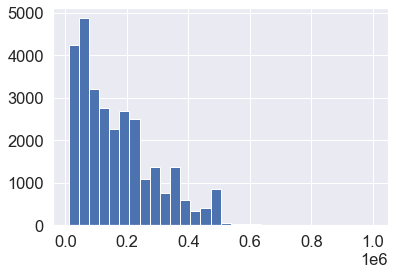

In [42]:
df['credit_limit'].hist(bins = 30);

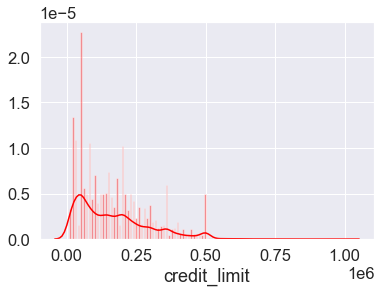

In [49]:
sns.distplot(df['credit_limit'], kde = True, bins = 200, color = "red");

- There is a broad range associated with 'credit_limit' column.

### The statistics of 'age'

In [43]:
df['age'].mean(), df['age'].std()

(35.46654941486843, 9.214820556496239)

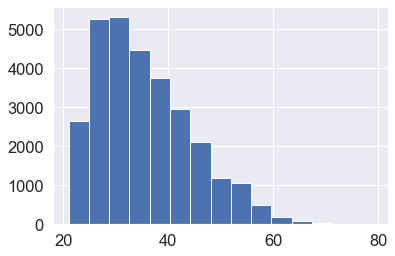

In [44]:
df['age'].hist(bins = 15);

### The statistics of 'default_count'

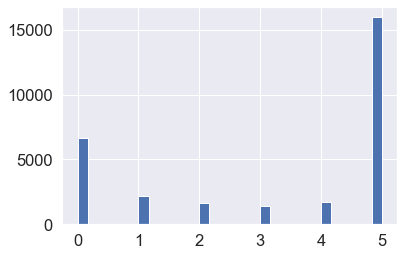

In [45]:
df['default_count'].hist(bins = 30);

In [46]:
df['default_count'].mean(), df['default_count'].std()

(3.263275383886897, 2.125415484788962)

- There is a broad range associated with 'default_count' column.

### The statistics of 'default_count'

In [47]:
df.query('next_default_payment == 1').shape[0]/df.shape[0]
# df['next_default_payment'].sum()/len(df['next_default_payment'])

0.2231955624704052

- About 22% of the clients have default in their next payment.

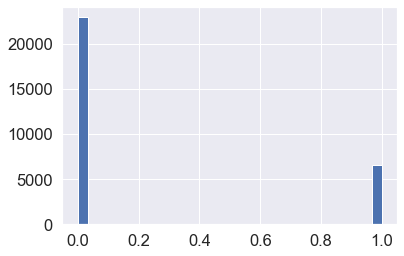

In [48]:
df['next_default_payment'].hist(bins = 30);

### Some values associated to bill columns and pay columns seems to be very large, more investigations are needed to see whether they are outliers or they just belong to the customer with higher statements and payments.

### The following investigations need to be done:

- The higher the bill amount, the more probabilty they cannot pay it, although the history is important
- The higher the credit balance, the higher the annual salary and credit score
- The higher the education, the higher the annual salary may be
- The effect of sex, marital status, and age on the payment
- The relation between education and credit line
- The relation between marital status and credit line, as credit line includes both the individual consumer credit and his/her family (supplementary) credit
- These relations as per different group
- The correlation between different feature
- Feature selection and adding feature
- Hypothesis testing

## EDA

### Step 1: Finding the correlations between attributes

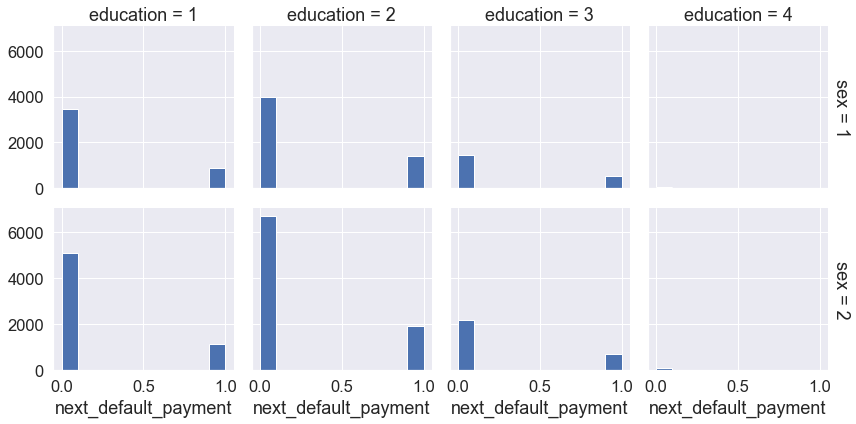

In [50]:
g = sns.FacetGrid(df, row = "sex", col = "education", margin_titles = True)
g.map(plt.hist, "next_default_payment");

### Let's have a general idea of some feature correlations:

In [51]:
corrMatrix = df[['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count', 'next_default_payment']].corr(method = 'pearson')


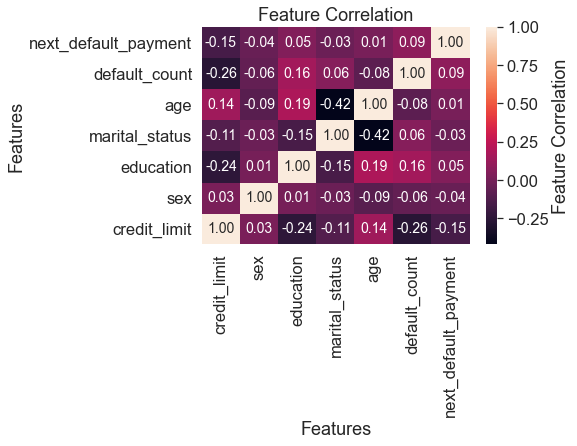

In [52]:
# cmap = sns.cm.rocket_r
A = sns.heatmap(corrMatrix, annot = True, annot_kws={"size": 14}, fmt = '0.2f', cbar_kws = {'label' : 'Feature Correlation'});
plt.xlabel('Features') 
plt.ylabel('Features') 
plt.title('Feature Correlation');
A.set_ylim(0,corrMatrix.shape[1]);
labels = [col for col in corrMatrix.columns]
# labels = ['Credit Limit', 'Sex', 'Education', 'Marital Status', 'Age', 'default_sum', 'Next Default Payment'];
# plt.xticks(rotation=90);
# plt.yticks(rotation=0);
A.set_xticklabels(labels);
A.set_yticklabels(labels);
# A.invert_yaxis()

In [53]:
education_corr = []
for i in range(1, 5):
    education_corr.append(df[(df['education'] == i)]['credit_limit'].corr(df[(df['education'] == i)]['next_default_payment']))

education_corr

[-0.12581410178442187,
 -0.15953511984167068,
 -0.1459269409362515,
 -0.1694225386700357]

In [54]:
marital_corr = []
for i in range(1, 4):
    marital_corr.append(df[(df['marital_status'] == i)]['credit_limit'].corr(df[(df['marital_status'] == i)]['next_default_payment']))

marital_corr

[-0.16324945939493693, -0.15381292183772383, -0.15074227583607594]

In [55]:
sex_corr = []
for i in range(1, 3):
    sex_corr.append(df[(df['sex'] == i)]['credit_limit'].corr(df[(df['sex'] == i)]['next_default_payment']))

sex_corr

[-0.15742697606636852, -0.15124939584144328]

### Investigating the attributes correlations in more detail:

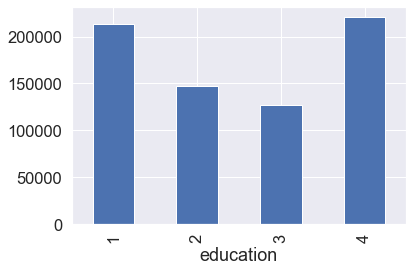

In [59]:
df.groupby('education')['credit_limit'].mean().plot(kind='bar');

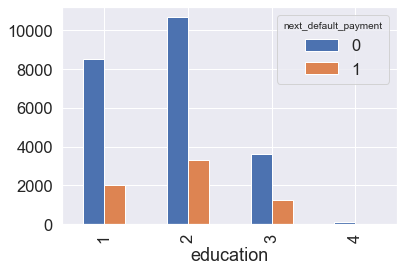

In [56]:
df_education = df.groupby(['education', 'next_default_payment']).size()
df_education.unstack(1).plot(kind='bar', stacked = False);
del df_education

In [57]:
df['credit_limit'].corr(df['education'])

-0.24378597191286405

In [58]:
# plt.scatter(df['education'], df['credit_limit']);

### Observation #1: The higher the education, the more the credit line. education = 4 is not clear though.

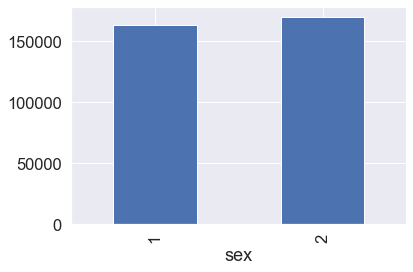

In [62]:
df.groupby('sex')['credit_limit'].mean().plot(kind='bar');

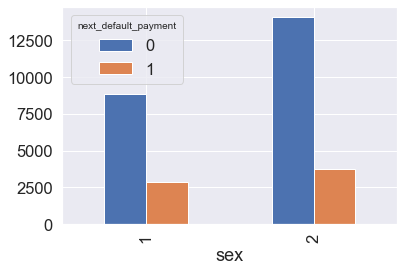

In [60]:
df_sex = df.groupby(['sex', 'next_default_payment']).size()
df_sex.unstack(1).plot(kind='bar', stacked = False);
del df_sex

In [61]:
df['credit_limit'].corr(df['sex'])

0.025079298588694454

### Observation #2: The sex attribute does not have any correlation with the credit limit.

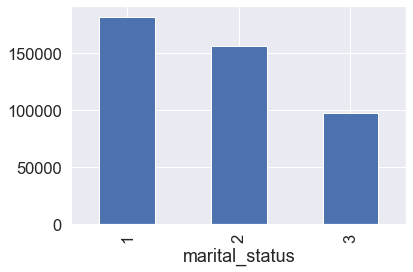

In [65]:
temp = df.groupby('marital_status')['credit_limit'].mean().plot(kind='bar') 

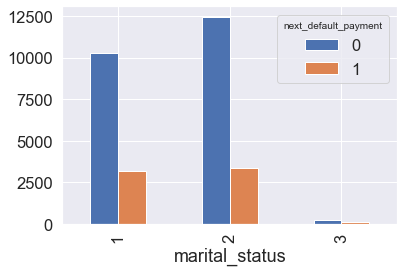

In [63]:
df_marital_status = df.groupby(['marital_status', 'next_default_payment']).size()
df_marital_status.unstack(1).plot(kind='bar', stacked = False);
del df_marital_status

In [64]:
df['credit_limit'].corr(df['marital_status'])

-0.1096965619671684

### Observation #3: The married clients seem to have higher credit line. That makes sense as the credit_line attribute includes the individual consumer credit and his/her family (supplementary) credit.

In [66]:
df['credit_limit'].corr(df['age'])

0.14414251967621422

In [67]:
# plt.scatter(df['age'], df['credit_limit']); 

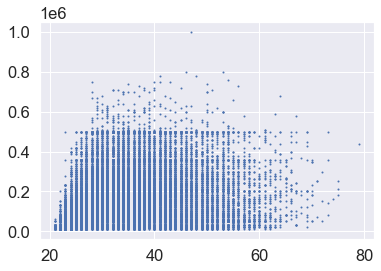

In [68]:
plt.plot(df['age'], df['credit_limit'], linestyle='', marker='o', markersize=1);

### Observation #4: There is no significant correlation between age and the credit limit.

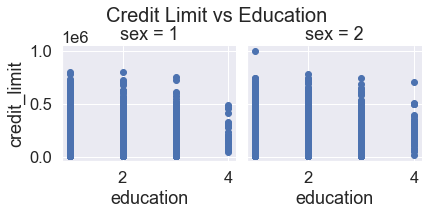

In [69]:
g = sns.FacetGrid(data = df, col = 'sex', col_wrap = 2, margin_titles = True)
g.map(plt.scatter,'education', 'credit_limit')
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle('Credit Limit vs Education', fontsize = 20)
g.add_legend();

### Let's break the dataframe into two, one with 'next_default_payment' = 0 and one with 'next_default_payment' = 1 and do the EDA for these two groups.

In [70]:
# temp1 = df[df['next_default_payment'] == 0]
# temp2 = df[df['next_default_payment'] == 1]
# temp_col = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count']

# f, axs = plt.subplots(2, 3, figsize = (10, 5), sharex = False, sharey = False)
# for i, axs in enumerate(axs.flatten()):
#     sns.distplot(temp1[temp_col[i]], kde = True, bins = 200, color = "red", ax = axs, label = 'Non-default');
#     sns.distplot(temp2[temp_col[i]], kde = True, bins = 200, color = "blue", ax = axs, label = 'Default');
#     ax.legend(labels = ['Non-default','Default'], loc='upper right')
    
# del temp1
# del temp2
# del temp_col

/Users/Helnaz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


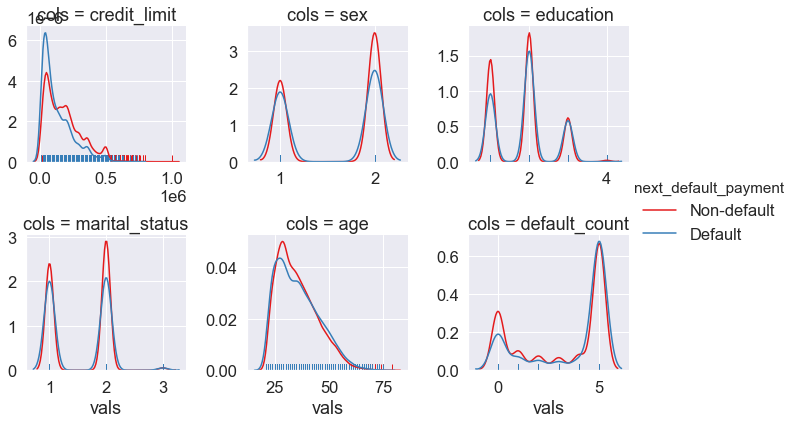

In [71]:
temp_col = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count']
temp_col_default = ['credit_limit', 'sex', 'education', 'marital_status', 'age', 'default_count', 'next_default_payment']
temp_df = df[temp_col_default]
temp_df = temp_df.melt(['next_default_payment'], var_name = 'cols',  value_name = 'vals')
g = sns.FacetGrid(temp_df, col = 'cols', hue = "next_default_payment", palette = "Set1", col_wrap = 3, sharex = False, sharey = False);
g = (g.map(sns.distplot, "vals", hist = False, rug = True));
g.add_legend(labels = ['Non-default', 'Default']);

del temp_df
del temp_col_default

### Observations #5: 
> Comapring the above plots for the average of the attributes shows that: 
- The clients with no default have lower credit line for the lower range while they have higher credit line for the lower range.
- The female clients with no default are more than the male clients.
- The educated clients with no default are more than the clients with less education.
- The single clients with no default are more than the married ones.
- The age does not seem to be a contributor, as its distribution for both categories are close. The combination of age and other attributes may be an important driver though.

### Hypothesis Testing